# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

Commonly used clustering algorithm with key characteristics being automatic number of clusters and density based clustering. Highly adaptable to noise and outliers. Adaptable to clusters of more unique shapes. 

## Definitions 
- *Eps* - Maximum radius of the neighborhood around a point
- *MinPts* - minimum number of points in the radius of Eps of a certain point. Larger datasets will most likely require a higher minPts. 
- *Core Point* - a point with n points greater than MinPts.
- *Border Point* - a point with n points less than MinPts but contains a core point within Eps radius.
- *Outlier* - neither a core point or border point.
- *Directly Density Reachable* - A point P is density reachable to a point Q if dist(P, Q) <= Eps (euclidean distance between the points is less than epsilon) and Q is a core point. Not symmetrical so Q does not necessarily have to be density reachable to P.
- *Density Reachable* - An object is density reachable if there is a chain of objects such that each is directly density reachable from the previous.
- *Density Connectivity* - An object Q is density-connected to an object P if both are density reachable from a certain object called O.

## Algorithm
- Select a random point P
- retrive all points density-reachable from P based on Eps and MinPts
- If P is a core point, make it a cluster
- If P is a border point, place it in the cluster of the core point within its radius
- If P is neither a core or border point, mark it as a noise point.
- Continue until all points are processed

## Potential Implementation of DBSCAN

In [1]:
import numpy as np

In [2]:
# help function used for calculations
def euclidean_distance(x1, x2):
    return (sum(x1-x2)**2)**.5

In [ ]:
class DBSCAN():
    def __init__(self, eps=1, minpts=5):
        self.eps = eps
        self.minpts = minpts
        
    def _get_neighbors(self, i):
        """Returns a list of indexes of all the points within Eps of a point i"""
        neigh = []
        idxs = np.arange(len(self.x))
        
        # iterate through each point that is not I
        for idx, pt in enumerate(self.x[idxs != i]):
            d = euclidean_distance(self.x[i], pt)
            if d < self.eps:
                neigh.append(i)
        return np.array(neigh)
    
    def _expand_cluster(self, i, neigh):
        """recursively expand the cluster until reach the border"""
        # defining a base cluster with only one point
        cluster = [i]
        
        # go through each neighbor
        for n in neigh:
            if not n in self.visited_samples:
                self.visited_samples.append(n)
                
                # get the neighbors of the neighbor
                self.neighbors[n] = self._get_neighbors(n)
                
                # check to see if neighbor is a core point
                if len(self.neighbors[n] >= self.minpts):
                    # expand the cluster recursive
                    expanded = self._expand_cluster(n, self.neighbors[n])
                    cluster = cluster + expanded_cluster
                else:
                    # if the neighbor isnt a core point then only said neighbor is in the cluster
                    cluster.append(n)
            return cluster
        
    def _get_cluster_labels(self):
        """return sample labels as index of the cluster they are in"""
        # creates the label array with length of the data
        labels = np.full(shape=self.x.shape[0], fill_value=len(self.clusters))
        for cluster_i, cluster in enumerate(self.clusters):
            for i in cluster:
                labels[i] = cluster_i
        
        return labels
    
    def predict(self, x):
        self.x = x
        self.clusters = []
        self.visted_samples = []
        self.neighbors = {}
        n_samples = np.shape(self.x)[0]
        
        # iterate through each sample and create clusters from them if they have more neighbors than minpts
        
        for i in range(n_samples):
            if i in self.visited_samples:
                continue
            self.neighbors(i) = self._get_neighbors(i)
            if len(self.neighbors[i]) >= self.minpts:
                # if core point 
                self.visited_samples.append(i)
                # expand the cluster from the curent point
                new_cluster = self._expand_cluster(i, self.neighbors[i])
                # add cluster to list of clusters
                self.clusters.append(new_cluster)
                
        cluster_labels = self._get_cluster_labels()
        return cluster_labels

## SKLearn Implementation

In [6]:
# iris dataset for testing

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = datasets.load_iris()
x = iris.data
y = iris.target
example_dataset = StandardScaler().fit_transform(x)

In [9]:
from sklearn.cluster import DBSCAN

df = x

# defining basic parameters including eps, minpts, and metric type
dbscan_kwargs = {"eps": 0.5, "min_samples": 5, "metric": "euclidean"}

dbscan = DBSCAN(**dbscan_kwargs)
dbscan.fit(df)

DBSCAN()

### Finding Best eps and min_samples

min_samples should be chosen based on your knowledge of the domain of the data. Generally min_samples >= number of dimensions in dataset + 1.

the value of epsilon should define the maximum distance between two points. This can be done through a K Distance graph.

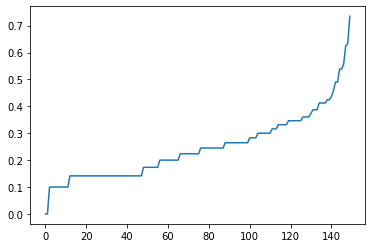

In [11]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
# use KNearestNeighbors to generate values for a KDistance graph
df = x
knn = NearestNeighbors(n_neighbors=2)
knn.fit(df)
distances, indices = knn.kneighbors(x)

# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# optimal eps found at the point of greatest curvature

The knee is at x:137 and y:0.4123105625617661. Use 0.4123105625617661 as eps


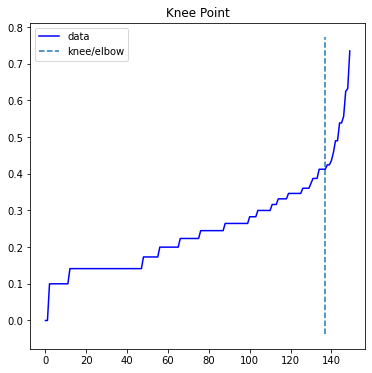

In [16]:
# code to automatically find the greatest curvature or knee

from kneed import KneeLocator

kneedle = KneeLocator(np.arange(len(distances)), distances, S=1.0, curve="convex", direction="increasing")

print(f"The knee is at x:{kneedle.knee} and y:{kneedle.knee_y}. Use {kneedle.knee_y} as eps")
kneedle.plot_knee()